In [1]:
!pip install kaggle

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=05c8973945c7c2e0fad4dfe48f79638b2e2ad4af20b07e6bd0d0d868901d040c
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [3]:
# need to be done once
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# need to be done once
# on Kaggle in the Profil go to Edit Profil, then download API Token and upload here, will be saved in Drive then
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bekassine123","key":"7dfdce531c81bea84f2d9f8b878a6b74"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset to big
#!kaggle competitions download -c siim-isic-melanoma-classification

In [6]:
# found a new dataset which is already resized to 300x300 and 640x640
!kaggle datasets download bitthal/resize-jpg-siimisic-melanoma-classification
!unzip /content/resize-jpg-siimisic-melanoma-classification.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: 640x640/train/ISIC_8512716.jpg  
  inflating: 640x640/train/ISIC_8513112.jpg  
  inflating: 640x640/train/ISIC_8513649.jpg  
  inflating: 640x640/train/ISIC_8514170.jpg  
  inflating: 640x640/train/ISIC_8514989.jpg  
  inflating: 640x640/train/ISIC_8515165.jpg  
  inflating: 640x640/train/ISIC_8515281.jpg  
  inflating: 640x640/train/ISIC_8515582.jpg  
  inflating: 640x640/train/ISIC_8515674.jpg  
  inflating: 640x640/train/ISIC_8516181.jpg  
  inflating: 640x640/train/ISIC_8516223.jpg  
  inflating: 640x640/train/ISIC_8516516.jpg  
  inflating: 640x640/train/ISIC_8516631.jpg  
  inflating: 640x640/train/ISIC_8516659.jpg  
  inflating: 640x640/train/ISIC_8516922.jpg  
  inflating: 640x640/train/ISIC_8517305.jpg  
  inflating: 640x640/train/ISIC_8517492.jpg  
  inflating: 640x640/train/ISIC_8518406.jpg  
  inflating: 640x640/train/ISIC_8519222.jpg  
  inflating: 640x640/train/ISIC_8519402.jpg  
  inflating: 

In [7]:
import numpy as np
import pandas as pd

# load and display an image with Matplotlib
from matplotlib import image
#from matplotlib import pyplot

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0

import seaborn as sns

In [8]:
img_path = '/content/300x300/train/'

IMG_SIZE = 224

#NUM_CLASSES = 2

uint8
(300, 300, 3)


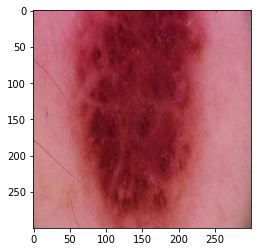

In [9]:
# load image as pixel array
image_test = image.imread(img_path + 'ISIC_9999806.jpg')
# summarize shape of the pixel array
print(image_test.dtype)
print(image_test.shape)
# display the array of pixels as an image
plt.imshow(image_test)
plt.show()

In [10]:
train_csv = pd.read_csv('/content/drive/MyDrive/train.csv')
#train_csv = pd.read_csv('train.csv')

In [11]:
print(train_csv.head())

     image_name  patient_id     sex  ...  diagnosis benign_malignant target
0  ISIC_2637011  IP_7279968    male  ...    unknown           benign      0
1  ISIC_0015719  IP_3075186  female  ...    unknown           benign      0
2  ISIC_0052212  IP_2842074  female  ...      nevus           benign      0
3  ISIC_0068279  IP_6890425  female  ...    unknown           benign      0
4  ISIC_0074268  IP_8723313  female  ...    unknown           benign      0

[5 rows x 8 columns]


### test

In [12]:
# add path to image names for loading

train_data = []
for img in train_csv['image_name']:
  train_data.append(img_path + img + '.jpg')
len(train_data), train_data[0]

(33126, '/content/300x300/train/ISIC_2637011.jpg')

In [13]:
train_label = train_csv['target']
len(train_label), train_label[10]

(33126, 0)

In [14]:
# make new dataframe, only with images names and path

train_df = pd.DataFrame(train_data)
train_df.columns = ['image']
train_df['target'] = train_label

In [15]:
# append metadata to dataframe as one-hot-encoding
lis_sex = []
for sex in train_csv['sex']:
  if sex == 'male':
    lis_sex.append(1)
  else:
    lis_sex.append(0)
train_df['sex']= pd.DataFrame(lis_sex)

lis=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for age in train_csv['age_approx']:
  numb = age /5
  for n in range(18):
    if tf.cast(n,tf.int64) == tf.cast(numb,tf.int64):
      lis[n].append(1)
    else:
        lis[n].append(0)
for n in range(18):
  train_df['numb'+str(n)]=pd.DataFrame(lis[n])

lis_site=[[],[],[],[],[],[]]
for site in train_csv['anatom_site_general_challenge']:
  numb = 6
  if site == 'head/neck':
    numb = 0
  if site =='upper extremity':
    numb = 1
  if site == 'lower extremity':
    numb = 2
  if site == 'torso':
    numb = 3
  if site == 'palms/soles':
    numb = 4
  if site == 'oral/genital':
    numb = 5
  for n in range(6):
    if n == numb:
      lis_site[n].append(1)
    else:
      lis_site[n].append(0)
for n in range(6):
  train_df['site'+str(n)]=pd.DataFrame(lis_site[n])
  




In [16]:
# split dataset into train set and validation set
# duplicate the 1-labeled images by factor

X_train, X_val, y_train, y_val = train_test_split(train_df['image'], train_df.loc[:,'target':'site5'], test_size=0.2)

factor = 5


column_names = train_df.loc[:,'target':'site5'].columns

lis_1 = []
lis_2 = []
l = len(X_train)
for n in range(l):
  if tf.cast(y_train.iloc[n][0], tf.int64) == 1:
    lis_1.append(X_train.iloc[n])
    lis_2.append(y_train.iloc[n].to_numpy())
s_1 = pd.Series(lis_1, index=lis_1)
s_2 = pd.DataFrame(lis_2, columns=column_names)
for n in range(factor-1):
  X_train = X_train.append(s_1, ignore_index=True)
  y_train = y_train.append(s_2, ignore_index=True)

train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)

print(len(X_train))
n=0
for label in y_train['target']:
  if label == 1:
    n= n+1
print(n)
print(1-n/len(X_train))

28372
2340
0.9175243197518681


In [17]:
# use tensorflow ImageDataGenerator to load images for input 
# from https://keras.io/api/preprocessing/image/#flow_from_dataframe-method

IMAGE_SIZE = 224
BATCH_SIZE=64

# train generator with augmentation (flips) and rescale, so that values are between 0 & 1
train_data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=45,zoom_range=[0.8,1])

train_generator = train_data_gen.flow_from_dataframe(
    train_data,
    x_col=0,
    y_col=column_names,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=True
)

# validation generator with rescale, so that values are between 0 & 1
validation_data_gen = ImageDataGenerator()

validation_generator = validation_data_gen.flow_from_dataframe(
    val_data,
    x_col='image',
    y_col=column_names,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 28372 validated image filenames.
Found 6626 validated image filenames.


In [20]:
# image generating function that inherit the ones above. It uses replace_one_dimension to replace one color by metadata
def own_train_generator_func():
    count = 0
    while True:
        if count == len(train_data.index):
            train_generator.reset()
            #break
        count += 1
        data = train_generator.next()
        targets = data[1][:,0]
        yield data[1][:,1:], targets

def own_validation_generator_func():
    count = 0
    while True:
        if count == len(val_data.index):
            validation_generator.reset()
            #break
        count += 1
        data = validation_generator.next()
        targets = data[1][:,0]

        yield data[1][:,1:], targets

In [ ]:
#custom loss function
def custom_loss_function(y_true, y_pred):
   imbalanced_cross_entropy = -(15 * tf.multiply(tf.cast(y_true, tf.float32), tf.math.log(y_pred))+tf.multiply(tf.cast((1 - y_true), tf.float32),tf.math.log(1- y_pred)))
   return tf.reduce_mean(imbalanced_cross_entropy, axis=-1)

In [ ]:
#"area under the curve" as metric function
my_metric_fn = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, label_weights=None
    )

In [57]:
from keras.layers import Input, Dense
from keras.models import Model
#build small model
visible = Input(shape=(25))
hidden1 = Dense(128, activation='relu')(visible)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model_1 = Model(inputs=visible, outputs=output)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile model
model_1.compile(
    loss=[custom_loss_function],
    optimizer=opt,
    metrics=[my_metric_fn]
)
# summarize layers
print(model_1.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 21,141
Trainable params: 21,141
Non-trainable params: 0
_________________________________________________________________
None


200/200 [==============================] - 139s 697ms/step - loss: 1.4578 - auc: 0.6547 - val_loss: 0.8862 - val_auc: 0.6623


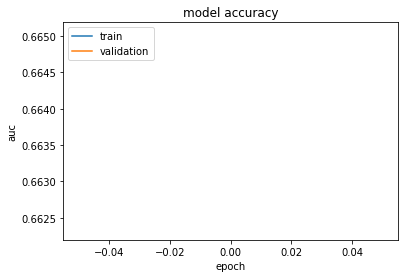

In [58]:
hist = model_1.fit(
    x=own_train_generator_func(),
    steps_per_epoch = 200, epochs=1,
    validation_data=own_validation_generator_func(),
    validation_steps=100,
    verbose=1)
plot_hist(hist)

In [43]:
def plot_hist(hist):
    plt.plot(hist.history["auc"])
    plt.plot(hist.history["val_auc"])
    plt.title("model accuracy")
    plt.ylabel("auc")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [65]:
#saving model
model_1.save('/content/drive/MyDrive/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assets


In [111]:
#make prediction for all pictures in validation dataset
y_pred = model_1.predict(y_val.loc[:,'sex':'site5'])
# floor of predictions
edge = 0.51
y_pred = tf.cast(tf.math.floor(y_pred+ (1-edge)), tf.int64)
print(y_pred[0:10])

tf.Tensor(
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]], shape=(10, 1), dtype=int64)


In [112]:
#construct confusion matrix
con_mat = tf.math.confusion_matrix(labels=y_val['target'], predictions=y_pred).numpy()

#edit confusion matrix for plotting
classes = [0,1]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

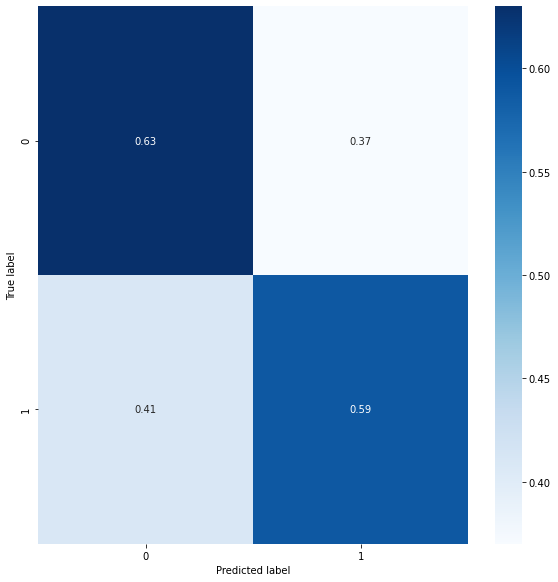

In [113]:
#plot confusion matrix
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()